In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# A genetic toggle switch

## Question 1.1:

#### Gardner and colleagues constructed a genetic switch using two repressors, each of which repressed the other. To be able to switch the genetic network from one state to the other, they used inducers – small molecules that induce gene expression. The inducers inhibit the action of the repressors because a repressor bound by an inducer is unable to bind to DNA. If the two repressors are u and v and Iu is the inducer that binds to u and Iv is the inducer that binds to v, then we can model the system as $\frac{du}{dt}=−u+\frac{a_u}{1+[\frac{v}{(1+\frac{I_v}{K})^n}]^b}$ and $\frac{dv}{dt}=−v+\frac{a_v}{1+[\frac{u}{(1+\frac{I_u}{K})^n}]^b}$ where $a_u$ is the maximum rate of expression of $u$ and av is the maximum rate of expression of $v$. The binding affinity of an inducer molecule to a repressor is given by $K$, and $b$ and $n$ are Hill numbers: $b$ describes the cooperativity of repression and n describes the cooperativity of inducer binding to repressors. The degradation rates of $u$ and $v$ are assumed equal and set the unit of time (and so are both one). A true switch should exhibit history-dependent behaviour. Gardner and colleagues demonstrated such hysteresis by applying a series of inducers to their genetic construct. We will repeat this experiment with the model. Write some code to simulate the dynamics of $u$ and $v$ using odeint. You will need to create a function that returns $\frac{du}{dt}$ and $\frac{dv}{dt}$ given $u$ and $v$ and $t$. As we will vary the concentration of inducers, the function should also take the concentrations of the inducers as inputs. Let $a_u$=10, $a_v$=9, $K$=3, and both Hill numbers equal 2.

In [2]:
#Making a function to model the switch brought by the repressors and inducers
def switch(y, t, params, i):
    au, av, K, b, n = params
    Iu, Iv = i
    u, v = y
    
    dydt = np.empty(len(y))
    dydt[0] = -u + (au / (1 + (v / (1 + Iv/K)**n)**b))
    
    dydt[1] = -v + (av / (1 + (u / (1 + Iu/K)**n)**b))
    
    return dydt #contains du/dt in the first element and dv/dt in the second \
    #element

#Setting the parameters corresponding to au, av, K, b, n
params = [10, 9, 3, 2, 2]

##  Question 1.2: 

#### Starting with $u=v=0$, simulate the application of $I_u$ for 50 time units (set $I_u$=100 and $I_v$=0), then remove $I_u$ for another 50 time units. Following this removal, apply $I_v$ for 50 time units (set $I_u$=0 and $I_v$=100) and then remove $I_v$ for another 50 time units. You will need to call odeint four times and use the final values of $u$ and $v$ from the last call to odeint as the inital values for the current call to odeint. Plot your results. Do you see hysteresis (history-dependent behaviour)? Why? Change both Hill numbers to 1. Rerun the experiment and explain what you observe. 

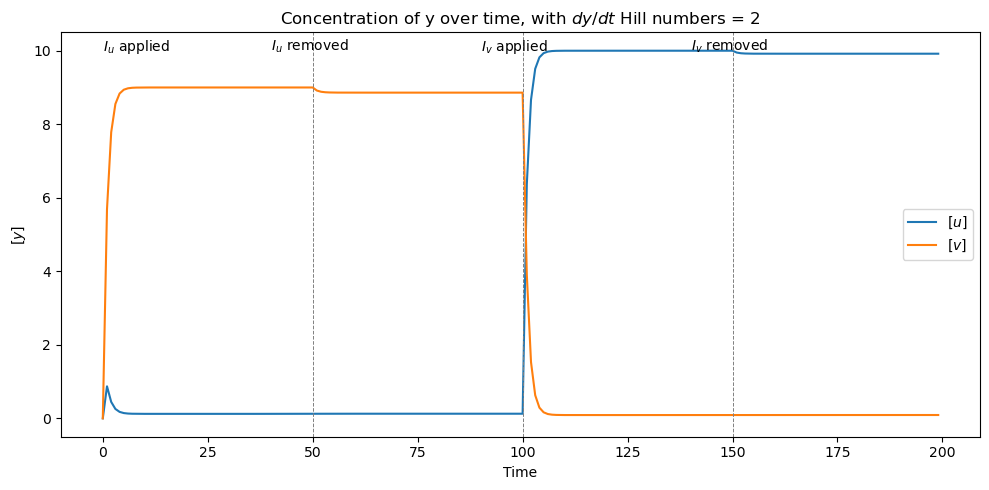

In [3]:
#Setting the initial concentrations of u and v to 0, and resetting initial \
#parameters
u = v = 0
y = [u, v]
params = [10, 9, 3, 2, 2]

#Time array of 50 time-steps
t = np.linspace(0,49,50)

#Finding the concentrations of u and v for each of the time points from 't'
#Each y1-y4 will have 'u' in the first column and 'v' in the second column
y1 = odeint(switch, y, t, args = (params, [100,0],))
y2 = odeint(switch, y1[-1], t, args = (params, [0,0],))
y3 = odeint(switch, y2[-1], t, args = (params, [0,100],))
y4 = odeint(switch, y3[-1], t, args = (params, [0,0],))

#Time array for all the time combined
total_time = np.linspace(0,199,200)

#Joining all y1-y4 into a single array
all_y = np.concatenate((y1, y2, y3, y4), axis=0)

#Plotting the concentration of u and v (referred to as 'y') over time
plt.figure(figsize=(10,5))
plt.plot(total_time, all_y[:,0], label = "$[u]$")
plt.plot(total_time, all_y[:,1], label = "$[v]$")
plt.legend()
plt.xlabel("Time")
plt.ylabel("$[y]$")
plt.title("Concentration of y over time, with $dy/dt$ Hill numbers = 2")
plt.annotate("$I_u$ applied", xy=(0,0), xytext=(0, 10))
plt.annotate("$I_u$ removed", xy=(50,0), xytext=(40, 10))
plt.annotate("$I_v$ applied", xy=(100,0), xytext=(90, 10))
plt.annotate("$I_v$ removed", xy=(150,0), xytext=(140, 10))
for i in range(3):
    plt.axvline(x=(i+1)*50, color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

Hysteresis is observed in this model, as even when $I_u$ or $I_v$ is removed after being applied, the concentration of $v$ and $u$ respectively does not decrease back to 0. Further confirmed by the phase plots shown below, once $I_u$ is added, the concentration of $v$ reaches a steady-state at around a concentration of 9 that is unaltered once $I_u$ is removed. The same occurs for $I_v$ and the concentration of $u$. However, once $I_v$ is added in the third time-step, $[v]$ moves down to the original steady-state at 0.
In this case, the number of steady-states depends on the amount of $I_v$ and $I_u$. When both $I_v$ and $I_u$ are 0, there are two steady-states, shown by the phase plots below. However, when only one is present, there is only one steady-state. Since $[v]$ and $[u]$ do not revert back to the lower steady-state once $I_u$ and $I_v$ are removed respectively, this shows hysteresis. This is possible because of the Hill numbers for both $\frac{du}{dt}$ and $\frac{dv}{dt}$ being higher than 1, causing ultrasensitivity.

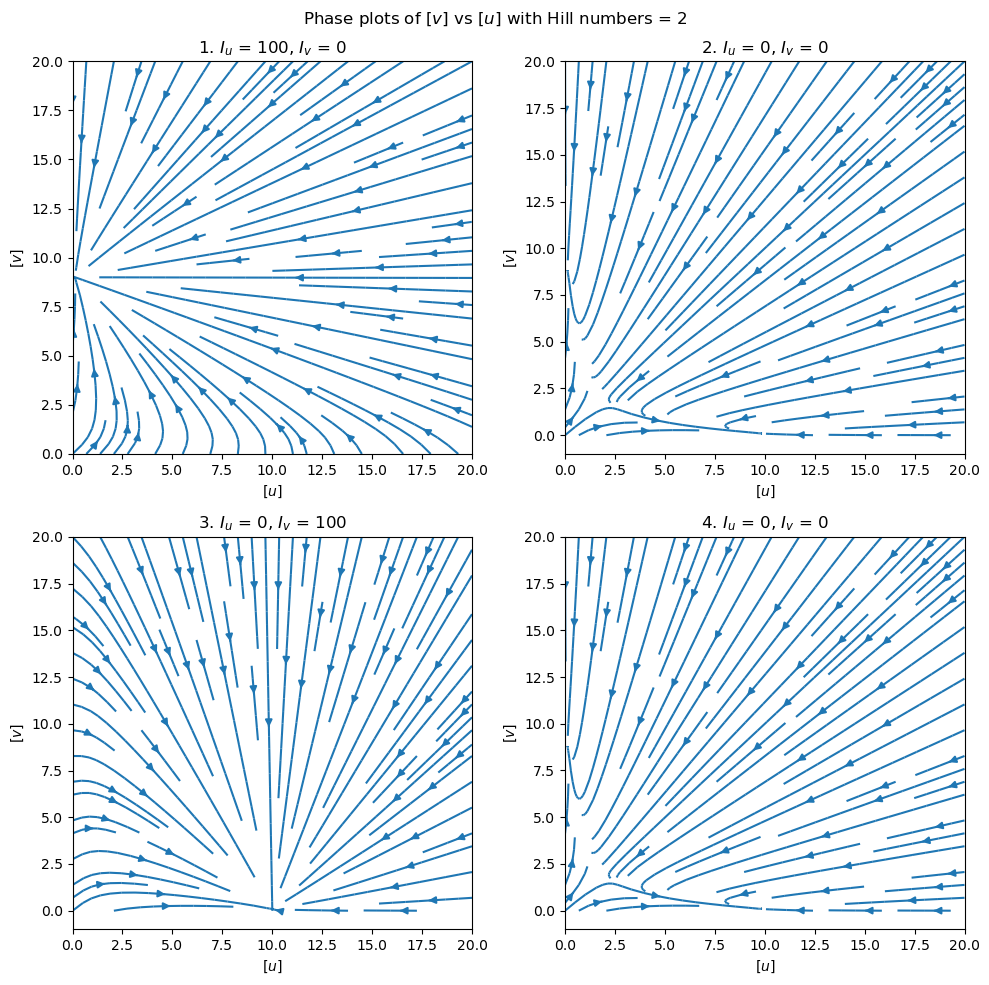

In [4]:
#Resetting parameters
au, av, K, b, n = [10, 9, 3, 2, 2]

#Setting all the Iu and Iv combinations in order
i_list = [[100,0],[0,0],[0,100],[0,0]]
u = np.linspace(0,20,100)
v = np.linspace(0,20,100)
u, v = np.meshgrid(u, v)

#Plotting phase plots of u vs v to get a better visual of where the steady-states \
#of the system occur
plt.figure(figsize = (10,10))
for i in range(4):
    Iu, Iv = i_list[i]
    plt.subplot(2,2,i+1)
    plt.streamplot(u,v,-u + (au / (1 + (v / (1 + Iv/K)**n)**b)), -v + (av / \
                  (1 + (u / (1 + Iu/K)**n)**b)))
    plt.title(f"{i+1}. $I_u$ = {Iu}, $I_v$ = {Iv}")
    plt.xlabel("$[u]$")
    plt.ylabel("$[v]$")
    plt.suptitle(f"Phase plots of $[v]$ vs $[u]$ with Hill numbers = 2")
plt.tight_layout()
plt.show()

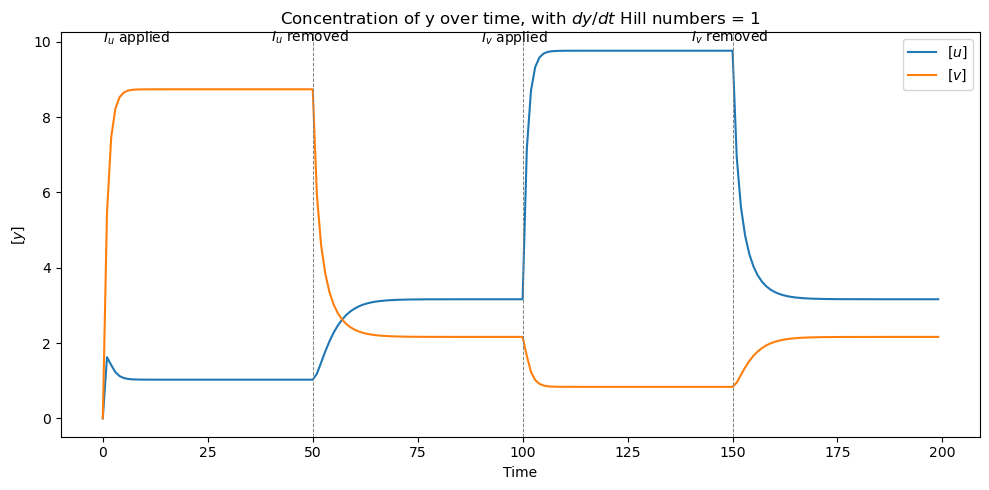

In [5]:
#Repeating with the Hill numbers both changed to 1
params = [10, 9, 3, 1, 1]

#Setting the initial concentrations of u and v to 0
u = v = 0
y = [u, v]

#Time array of 50 time-steps
t = np.linspace(0,49,50)

#Each y1-y4 will have 'u' in the first column and 'v' in the second column
y1 = odeint(switch, y, t, args = (params, [100,0],))
y2 = odeint(switch, y1[-1], t, args = (params, [0,0],))
y3 = odeint(switch, y2[-1], t, args = (params, [0,100],))
y4 = odeint(switch, y3[-1], t, args = (params, [0,0],))

#Time array for all the time combined
total_time = np.linspace(0,199,200)

#Joining all y1-y4 into a single array
all_y = np.concatenate((y1, y2, y3, y4), axis=0)

#Plotting the concentration of u and v (referred to as 'y') over time
plt.figure(figsize=(10,5))
plt.plot(total_time, all_y[:,0], label = "$[u]$")
plt.plot(total_time, all_y[:,1], label = "$[v]$")
plt.legend()
plt.xlabel("Time")
plt.ylabel("$[y]$")
plt.title("Concentration of y over time, with $dy/dt$ Hill numbers = 1")
plt.annotate("$I_u$ applied", xy=(0,0), xytext=(0, 10))
plt.annotate("$I_u$ removed", xy=(50,0), xytext=(40, 10))
plt.annotate("$I_v$ applied", xy=(100,0), xytext=(90, 10))
plt.annotate("$I_v$ removed", xy=(150,0), xytext=(140, 10))
for i in range(3):
    plt.axvline(x=(i+1)*50, color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

Upon changing the Hill numbers to 1, there is no longer any hysteresis because there is only one steady-state for each parameter conditions (of $I_u$ and $I_v$) in this case. Once $I_u$ or $I_v$ is removed, both $u$ and $v$ return to their own steady-state concentrations around 3. This is supported by the phase plots below that indicate that their steady-states when $I_v$ and Iu are both 0 is around 3 for both $u$ and $v$.
In this case, regardless of the values of $I_v$ and $I_u$, there will always be one steady-state in each case as $\frac{du}{dt}$ and $\frac{dv}{dt}$ contain Hill numbers of 1, making them hyperbolic. As such, for each change in parameter of $I_v$ and $I_u$, the system will be driven to this one steady-state, and therefore there is no hysteresis.

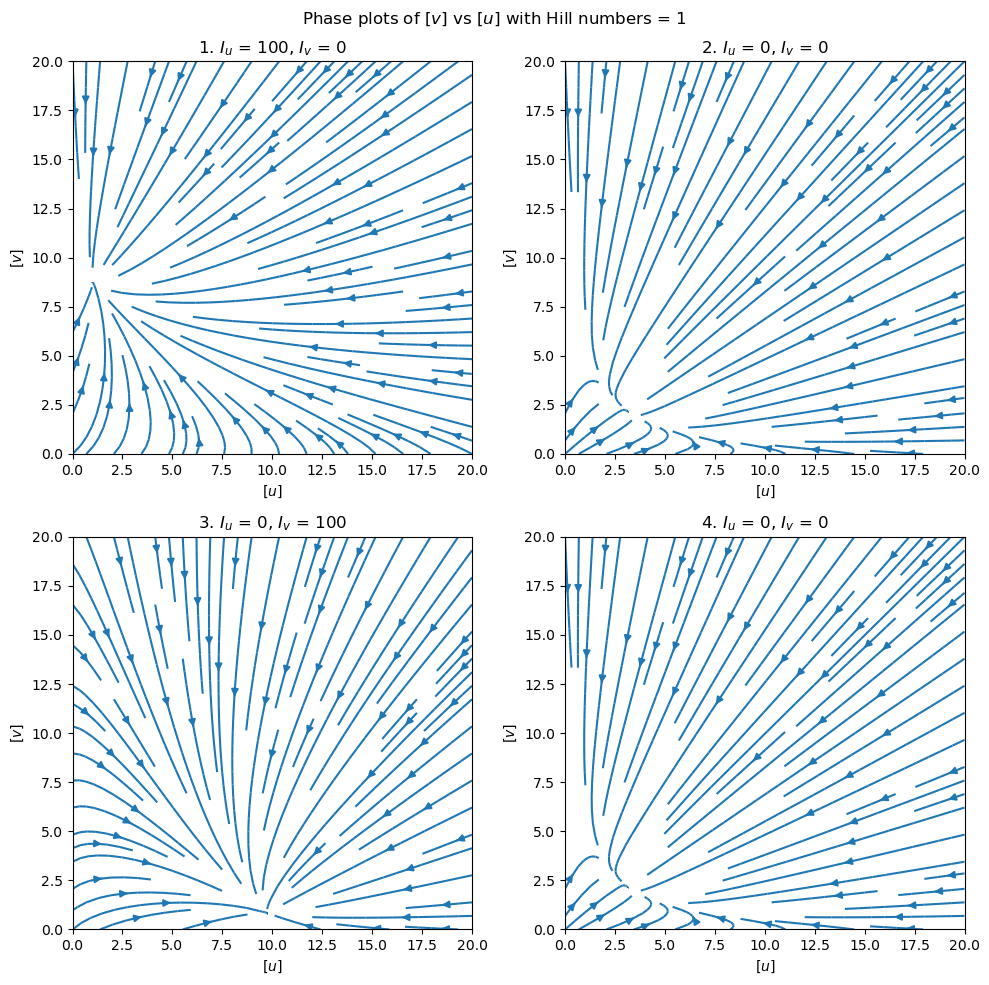

In [6]:
#Resetting parameters
au, av, K, b, n = [10, 9, 3, 1, 1]

#Setting all the Iu and Iv combinations in order
i_list = [[100,0],[0,0],[0,100],[0,0]]
u = np.linspace(0,20,100)
v = np.linspace(0,20,100)
u, v = np.meshgrid(u, v)

#Plotting phase plots of u vs v to get a better visual of where the steady-states \
#of the system occur
plt.figure(figsize = (10,10))
for i in range(4):
    Iu, Iv = i_list[i]
    plt.subplot(2,2,i+1)
    plt.streamplot(u,v,-u + (au / (1 + (v / (1 + Iv/K)**n)**b)), -v + (av / \
                  (1 + (u/(1 + Iu/K)**n)**b)))
    plt.title(f"{i+1}. $I_u$ = {Iu}, $I_v$ = {Iv}")
    plt.xlabel("$[u]$")
    plt.ylabel("$[v]$")
plt.suptitle(f"Phase plots of $[v]$ vs $[u]$ with Hill numbers = 1")
plt.tight_layout()
plt.show()

## Question 1.3

#### Determine the nullclines of the model system. To investigate the stability of the fixed points, plot the nullclines on the same graph with $u$ on the $x$-axis and $v$ on the $y$-axis and for $I_u=I_v=0$. Picking 10 initial conditions for $u$ and $v$, use odeint to determine their time evolution and plot the trajectories on the same graph as your nullclines. You can use the alpha option in plt.plot to increase the transparency of the plotted trajectory. Mark the start and the end points of each trajectory with a point. Explain which fixed points are stable and, from the trajectories you plotted, why. 

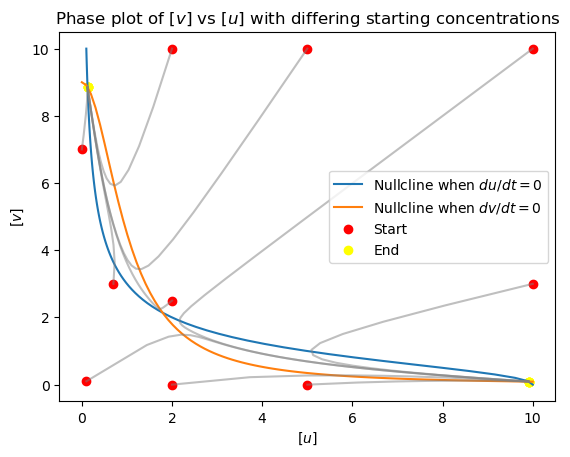

In [7]:
#Resetting parameters and initial values
Iu, Iv = [0,0]
params = [10, 9, 3, 2, 2]
au, av, K, b, n = params


#The nullclines occur at du/dt = 0 and dv/dt = 0, so:
#u = (au / (1 + (v / (1 + Iv/K)**n)**b))
#v = (av / (1 + (u / (1 + Iu/K)**n)**b))

#Finding the nullcline when du/dt = 0
v1 = np.linspace(0,10,100)
u1 = (au / (1 + (v1 / (1 + Iv/K)**n)**b))

#Finding the nullcline when dv/dt = 0
u2 = np.linspace(0,10,100)
v2 = (av / (1 + (u2 / (1 + Iu/K)**n)**b))

#Plotting the nullclines
plt.figure()
plt.plot(u1, v1, label = f"Nullcline when $du/dt = 0$")
plt.plot(u2, v2, label = f"Nullcline when $dv/dt = 0$")

#Starting with 10 chosen initial conditions of u and v
u = [2, 5, 10, 2, 10, 2, 5, 0.1, 0.7, 0]
v = [10, 10, 10, 2.5, 3, 0, 0, 0.1, 3, 7]
t = np.linspace(0, 50, 200)

for i in range(10):
    yi = [u[i], v[i]]
    y = odeint(switch, yi, t, args = (params, [Iu, Iv],))
    
    #Plotting the path of concentration change in u and v for differing starting \
    #concentrations, all ending in a stable steady-state
    plt.plot(y[:,0], y[:,1], color='grey', alpha = 0.5)
    
    #Plotting a dot for the concentrations of u and v at the beginning (red) and \
    #end (yellow) of the time-steps
    start = plt.scatter(y[0,0], y[0,1], color='red')
    end = plt.scatter(y[-1,0], y[-1,1], color='yellow')

start.set_label("Start")
end.set_label("End")
plt.legend()
plt.xlabel("$[u]$")
plt.ylabel("$[v]$")
plt.title(f"Phase plot of $[v]$ vs $[u]$ with differing starting concentrations")
plt.show()

The fixed points (9.92, 0.09) and (0.13, 8.86) that are the last row from $y$ are stable. The third fixed point at roughly (1.9, 2.1) is unstable, because trajectories passing nearby still move away from it. In this case, they always end up at one of the two stable points.

## Question 1.4


#### Determining the bifurcation diagram for a bistable system is another way to demonstrate that the system exhibits hysteresis. Assume that the gene coding $u$ is positively controlled by another transcription factor. Increasing the concentration of this transcription factor will increase the parameter $a_u$ in the equation for $\frac{du}{dt}$. We will assume that the concentration of transcription factor changes only slowly and that the system reaches steady-state before the concentration of transcription factor changes again. Write code to increase $a_u$ from 0 to 35, and find the steady-state value of $u$ for each value of $a_u$ using the steady-state values of $u$ and $v$ for the previous value of $a_u$ as the initial conditions for the current value of $a_u$. Now decrease $a_u$ from 35 to 0 using, as before, the steady-state values for the previous au as the initial values for the new value of $a_u$. You can use the np.linspace command to set the values of $a_u$. Plot on the same graph the steady-state value of u against $a_u$ when $a_u$ is increased and when $a_u$ is decreased. Explain what you see. Is there a range of values for $a_u$ for which the switch once thrown on cannot be reset?

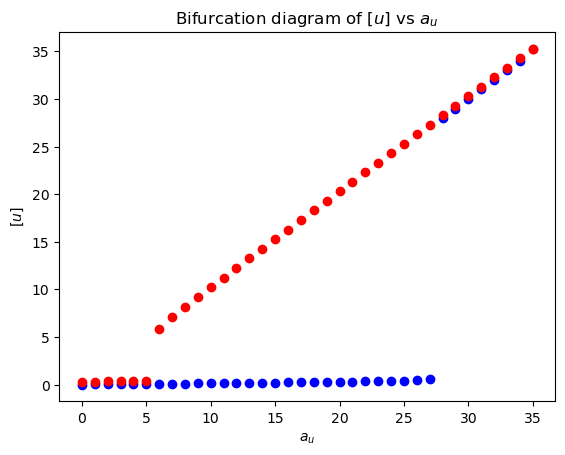

In [8]:
#Creating an array for au that increases from 0 to 35 and back down to 0
au = np.concatenate((np.linspace(0,35,36), np.linspace(35,0,36)))
Iu, Iv = [0, 0]
t = np.linspace(0,50,200)

plt.figure()
plt.xlabel("$a_u$")
plt.ylabel("$[u]$")
plt.title(f"Bifurcation diagram of $[u]$ vs $a_u$")

#Chosen initial u and v concentrations
yi = [2,10]
colour = "blue"

#Introducing a shift to be able to more clearly see the overlapping data points
shift = 0

#Looping through all the au values to plot each resulting [u] as a dot
for i in au:
    params = [i, 9, 3, 2, 2]
    y = odeint(switch, yi, t, args = (params, [Iu, Iv],))
    yi = y[-1]
    if i == 35:
        #Changing colour for decreasing au values from 35 to 0
        colour = "red"
        #Making the shift bigger than 0 to more clearly see the overlapping \
        #data points
        shift = 0.3
    plt.scatter(i, yi[0]+shift, color = colour)
    
plt.show()
    

This plot shows bistability and displays a switch activity containing an "on" stable steady-state (upper dots in the figure resulting in higher $[u]$) and an "off" stable steady-state (lower dots resulting in lower $[u]$). There are two bifurcations (shown to be saddle-node bifurcations through phase plots) occurring: roughly when $a_u$ is 5 and 27.
In this system as described, keeping $a_v$ constant, once the switch is thrown on, the system will remain in this on steady-state for $a_u$ values of 6 and higher, and would only be reset back to the off steady-state of $a_u$ is lower than 6. (Extra: However, when two stable steady-states are present, other parameter changes such as of $a_v$ may influence at what $a_u$ value the state may reset back to "off", therefore it is only certain that the switch thrown on is not reset when only the on steady-state is the only stable steady-state present.)

# A genetic oscillator

## Question 2.1


#### Elowitz and Leibler were the first people to construct a synthetic genetic oscillator. They added three genes to E. coli: the first gene repressed the second; the second gene repressed the third; and the third gene repressed the first.

#### Explain why this system has negative feedback.

The system is kept in check since there is a cycle of the three genes where each represses the next. If the first gene for example is expressed a lot, it will cause repression of the second gene. That means that there would be more of the third gene since it is not being repressed by the second gene much due to its low expression. Therefore, since there is a high amount of third gene expression, this would in turn cause repression of the first gene. This system design therefore controls the expression of each of the genes and does not let any of the three genes reach a high expression rate.
This is ultimately brought about by the $p_{i-1}$ present in the $\frac{dm_i}{dt}$ equation.

## Question 2.2

#### In the model used by Elowitz and Leibler to design their system, transcription for each gene is described as $\frac{dm_i}{dt}=−m_i+\frac{a}{1+p_{i−1}^2}$ where $m_i$ is the mRNA of the $i$'th gene and $p_i$ is the repressor encoded by that mRNA. For example, transcription of the second gene is repressed by the protein transcribed from the first gene with this repression described by a Hill function with a Hill number of 2. Time is given in units of the mRNA lifetime, and a is the maximum number of mRNAs transcribed per unit time. Both the mRNA lifetime and a are assumed to be the same for all three genes. Translation and protein degradation are modelled as $\frac{dp_i}{dt}=−b(p_i−m_i)$ where $b$ is the ratio of mRNA to protein lifetimes. Fix $b$=10 and by varying $a$, produce six plots of the concentration of one of the proteins as the system goes through a bifurcation from a steady-state to a limit cycle. Use odeint to perform the simulations and plt.subplot to draw all six plots in the same figure window. You will need to create a function that returns $\frac{dm_i}{dt}$ and $\frac{dp_i}{dt}$ for all three genes ($i$=1, 2 and 3). Make sure that at least one of the repressors has a positive initial value. If there are no repressors and no mRNAs, the system stays at this unstable steady-state.

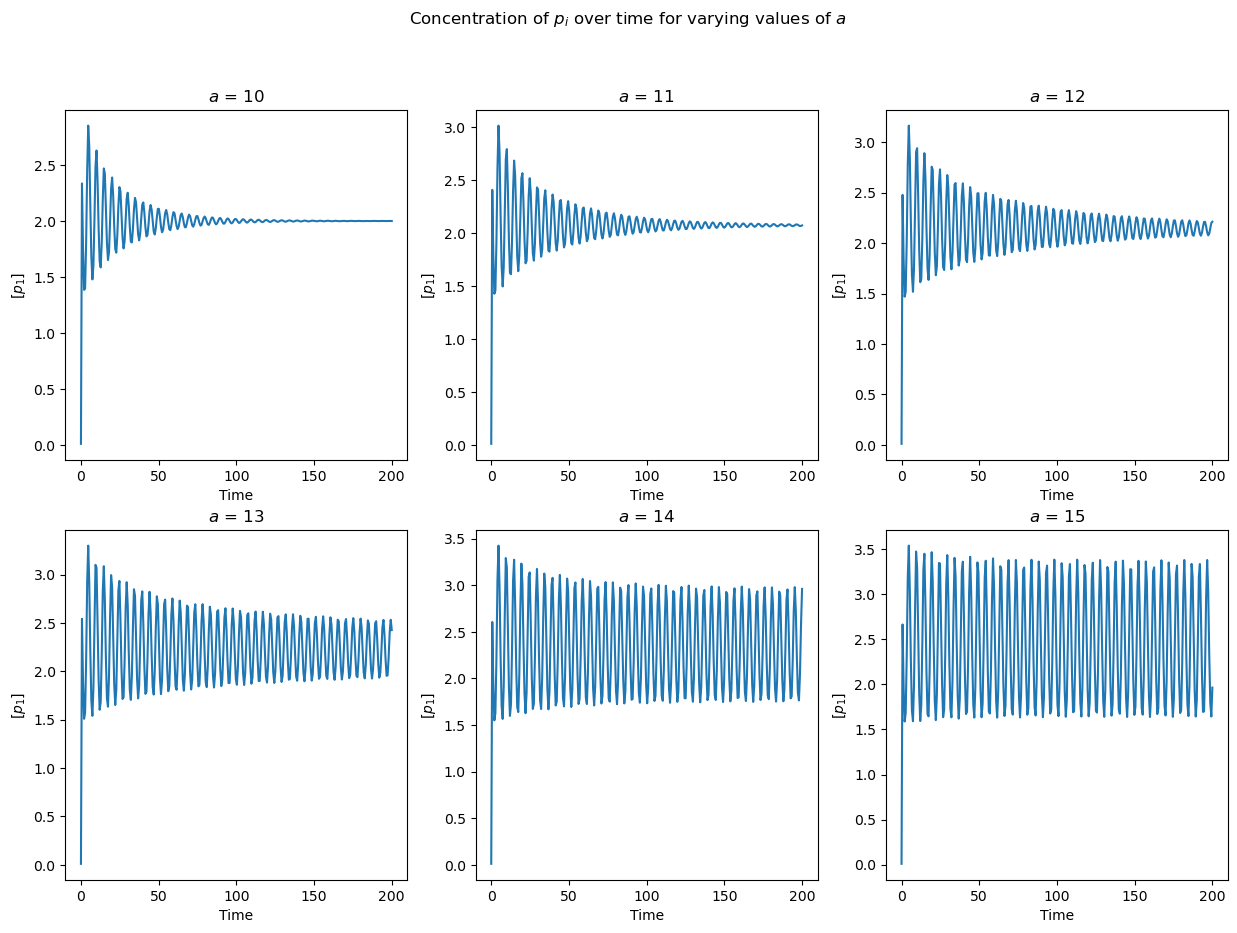

In [9]:
#Making a function to model the genetic oscillator of genes 1-3
def cycle(y, t, params):
    m1, p1, m2, p2, m3, p3 = y
    a, b = params
    
    dydt = np.empty(len(y))
    dydt[0] = -m1 + a/(1 + p3**2)
    dydt[1] = -b * (p1 - m1)
    
    dydt[2] = -m2 + a/(1 + p1**2)
    dydt[3] = -b * (p2 - m2)
    
    dydt[4] = -m3 + a/(1 + p2**2)
    dydt[5] = -b * (p3 - m3)
    
    return dydt #contains dm/dt and dp/dt pairs for the three genes in order

#Setting the time scale, a and b parameters, and initial concentrations of m \
#and p for each gene
t = np.linspace(0,200,300)
#Since a=14 already visually appeared to be oscillating (reaching a limit cycle), \
#most numbers chosen were lower to be able to visualise the 'steady-state' \
#transition to the oscillations
a = [10, 11, 12, 13, 14, 15]
b = 10

#Setting the starting concentrations to be low for all except for mRNA of the \
#first gene
yi = [1, 0.01, 0.01, 0.01, 0.01, 0.01]

plt.figure(figsize = (15,10))
counter = 1

#Plotting the concentration of protein of the first gene for varying values of \
#the parameter a
for i in a:
    params = [i, b]
    y = odeint(cycle, yi, t, args = ((params),))
    plt.subplot(2, 3, counter)
    plt.plot(t, y[:,1])
    plt.title(f"$a$ = {i}")
    plt.xlabel("Time")
    plt.ylabel("$[p_1]$")
    counter += 1

plt.suptitle("Concentration of $p_i$ over time for varying values of $a$")
plt.show()

## Question 2.3

#### An inefficient but effective way to determine the bifurcation diagram for this system is to form a grid of $a$ and $b$ values, to simulate the system for each point on the grid, and then classify its behaviour as either oscillatory or steady-state. Write some Python code to automate this procedure. Let $a$ run between $1$ and $10^3$ and $b$ run between $0.1$ and $10^3$. Loop through each point on the grid and use odeint to simulate the dynamics with these parameter values. Select a portion of the time-series of one of the proteins and use np.diff to determine if the protein is either at steady-state or is oscillating. To plot your bifurcation diagram, use the plt.contourf function. Explain why your bifurcation diagram has the shape it does. 

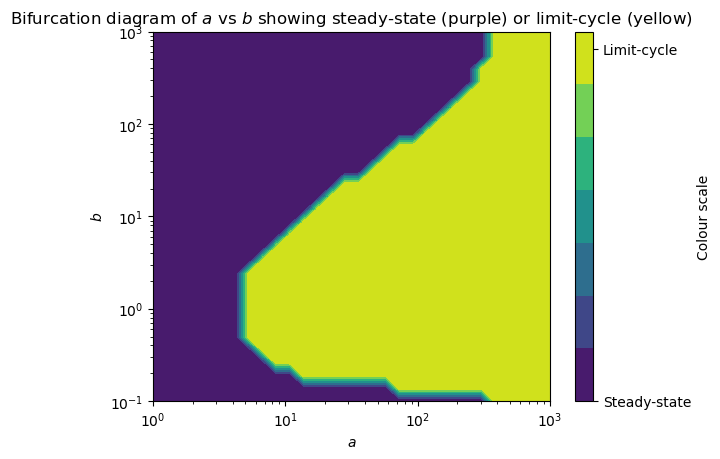

In [10]:
#Setting the arrays of parameters a and b
a = np.logspace(0, 3, 30)
b = np.logspace(-1, 3, 30)

t = np.linspace(0,200,300)

#Setting the starting concentrations to be low for all except for mRNA of the \
#first gene
yi = [1, 0.01, 0.01, 0.01, 0.01, 0.01]

#Creating an array to save the results of whether the combination of a and b \
#parameters creates an oscillatory limit-cycle (represented as '1') or not ('0')
answers = np.empty((len(b), len(a)))
for index_i, i in enumerate(a):
    for index_j, j in enumerate(b):
        params = [i, j]
        y = odeint(cycle, yi, t, args = ((params),))
        
        #Finding the differences in [p1] for the last 20 points
        differences = np.absolute(np.diff(y[-20:,1]))
        
        #Checking whether the average difference in [p1] is small
        if sum(differences)/len(differences) < 0.1:
            answers[index_j][index_i] = 0 #steady-state
        else:
            answers[index_j][index_i] = 1 #oscillating
         
        
        #Another attempt possible to try classify steady-state vs limit-cycle:
        
        #Taking the time values corresponding to the last few consecutive \
        #data points of the protein concentration of the first gene in order \
        #to identify whether the system has reached an oscillatory limit-cycle
        #time_series1 = y[-20:,1]
        #Taking the time values corresponding to earlier consecutive data points \
        #of the concentration of protein of the first gene to be able to compare \
        #to the last data points
        #time_series2 = y[-150:-130,1]
        
        #Finding the difference (amplitude) between the highest and lowest \
        #concentrations of p1 to compare between time groups
        #diff1 = max(time_series1) - min(time_series1)
        #diff2 = max(time_series2) - min(time_series2)
        
        #Setting a threshold for how small the amplitude can be at the end of the \
        #time scale to determine whether the system has reached a steady-state or \
        #a limit cycle. If the amplitude at the end of the time scale is much \
        #smaller than the amplitude at the earlier time points, then it is assumed \
        #that the system has not reached an oscillatory limit-cycle, and instead \
        #reaches a steady-state
        #if diff1 < 0.2 or diff1/diff2 < 0.9:
            #answers[index_j][index_i] = 0 #steady-state
        #else:
            #answers[index_j][index_i] = 1 #oscillating
            
        #However, this did not seem to work as well as the approach above
            

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.contourf(a, b, answers)
#A value of 1 refers to an oscillating limit-cycle state, whereas a value of \
#0 indicates a steady-state
legend = plt.colorbar(label="Colour scale")
legend.set_ticks([0, 1])
legend.set_ticklabels(['Steady-state', 'Limit-cycle'])
plt.xlabel("$a$")
plt.ylabel("$b$")
plt.title("Bifurcation diagram of $a$ vs $b$ showing steady-state (purple) or \
limit-cycle (yellow)")
plt.show()

This Hopf bifurcation diagram shows that the system tends to a steady-state for low $a$ values relative to $b$ (the purple region), but presents an oscillatory limit-cycle for high $a$ values relative to $b$ (the yellow region).
The purple consists of a weak negative feedback system, whereas the yellow involves a strong negative feedback system that leads to the oscillations (due to time delays for $p_{i-1}$ to affect $m_i$).

For high values of $a$ relative to $b$, the system reaches a limit-cycle, as the change in $p$ has an immediate effect on increasing $\frac{dm}{dt}$, and thus $m$. This creates the oscillations across each gene. Therefore, the limit-cycle is also achieved when $b$ is around 1 for lower values of $a$. 
For large values of $b$ relative to $a$, the differential equation for $\frac{dp}{dt}$ shows that $p$ will equal $m$ much faster (when change in $p$ becomes 0). With each cycle, $p$ is reaching $m$ faster, until the system reaches a steady-state in which the concentrations of $p$ and $m$ level off.
However, when $b$ is very small compared to $a$, such as 0.1, the system seems to take longer to reach a limit-cycle and has not yet reached constant oscillations nor a steady-state in the time frame tested.
Below is a summary of the change in concentration of $p_1$ over time for varying values of $a$ and $b$ where all this described can be visualised better, and supports the bifurcation diagram.

The bifurcation diagram could still potentially be improved by using other metrics to decide whether the system has reached a limit-cycle or not.

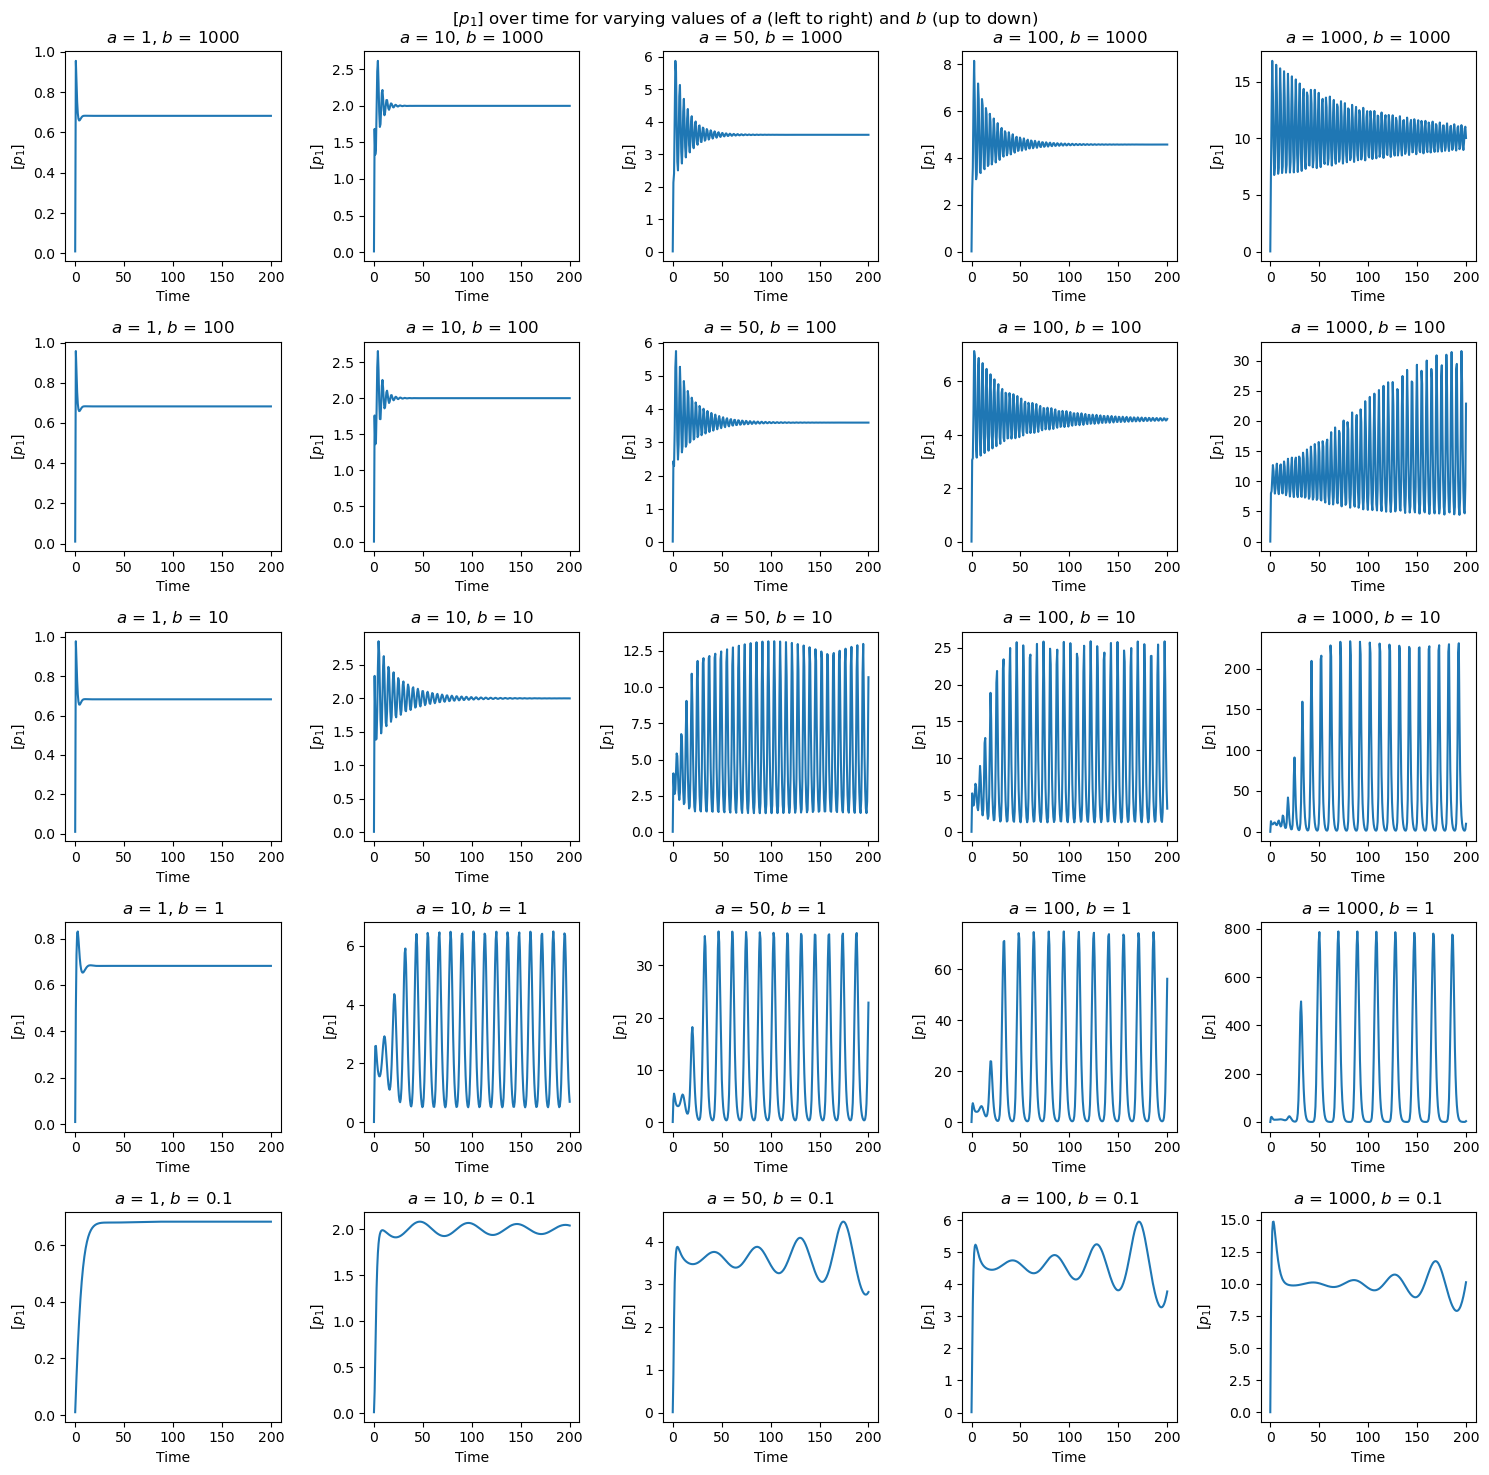

In [11]:
#Visualising the change in concentration of p1 over time for differeing values of \
#a and b for a visual check
t = np.linspace(0,200,300)
yi = [1, 0.01, 0.01, 0.01, 0.01, 0.01]

#Setting a and b to span the range from the bifurcation diagram
a = [1, 10, 50, 100, 1000]
b = [0.1, 1, 10, 100, 1000]


plt.figure(figsize = (15,15))
counter = 1

#Plotting the concentration of protein of the first gene for varying values of \
#the parameter a and b
for j in b[::-1]:
    for i in a:
        params = [i, j]
        y = odeint(cycle, yi, t, args = ((params),))
        plt.subplot(5, 5, counter)
        plt.plot(t, y[:,1])
        plt.title(f"$a$ = {i}, $b$ = {j}")
        plt.xlabel("Time")
        plt.ylabel("$[p_1]$")
        counter += 1
plt.suptitle("$[p_1]$ over time for varying values of $a$ (left to right) and $b$ \
(up to down)")
plt.tight_layout()
plt.show()